In [ ]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json

%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import *
from keras.optimizers import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

In [ ]:
# Load .env environment variables
load_dotenv()

In [ ]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [ ]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

In [44]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [45]:
# Set timeframe to '1D' pulling non-vol stock data
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-01", tz="America/New_York").isoformat()
# Set the ticker informationkrak
tickers = ["MSFT","ORCL","INTC","IBM"]


In [46]:
# Set timeframe to '1D' pulling non-vol stock data
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-01", tz="America/New_York").isoformat()
# Set the ticker informationkrak
tickers = ["IBM"]

In [47]:
df_ibm_ticker = api.get_barset(
   tickers,
   timeframe,
   start=start_date,
   end=end_date,
   limit=1000
).df
# Display sample data
df_ibm_ticker.head()

IBM                                 
                             open    high     low   close   volume
time                                                              
2019-01-02 00:00:00-05:00  112.01  115.98  111.69  114.84  3157499
2019-01-03 00:00:00-05:00  114.53  114.88  112.90  113.14  3235834
2019-01-04 00:00:00-05:00  114.91  117.49  114.44  117.28  3720470
2019-01-07 00:00:00-05:00  117.50  118.83  116.67  118.23  3186444
2019-01-08 00:00:00-05:00  119.66  120.57  118.98  119.87  3828313

In [48]:
df_ibm_ticker.iloc[0,:]

IBM  open          112.01
     high          115.98
     low           111.69
     close         114.84
     volume    3157499.00
Name: 2019-01-02 00:00:00-05:00, dtype: float64

In [49]:
df_ibm_ticker.dtypes

IBM  open      float64
     high      float64
     low       float64
     close     float64
     volume      int64
dtype: object

In [50]:
df_ibm_ticker.index.dtype

datetime64[ns, America/New_York]

<AxesSubplot:xlabel='time'>

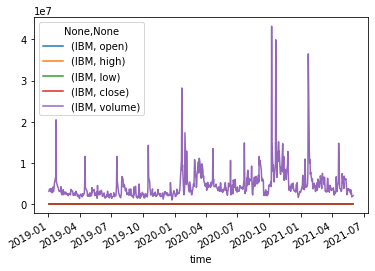

In [51]:
df_ibm_ticker.plot()

In [52]:
df_ibm_ticker.shape

(608, 5)

In [53]:
data = np.array(df_ibm_ticker)

# train test split, we can take last 100 data points as test set
train , test = data[0:-100], data[-100:]

In [54]:
#df_ibm_ticker[[('IBM', 'open'), ('IBM', 'high'),('IBM', 'low'), ('IBM', 'close'), ('IBM', 'volume')]]
train[0:5]

array([[1.120100e+02, 1.159800e+02, 1.116900e+02, 1.148400e+02,
        3.157499e+06],
       [1.145300e+02, 1.148800e+02, 1.129000e+02, 1.131400e+02,
        3.235834e+06],
       [1.149100e+02, 1.174900e+02, 1.144400e+02, 1.172800e+02,
        3.720470e+06],
       [1.175000e+02, 1.188300e+02, 1.166700e+02, 1.182300e+02,
        3.186444e+06],
       [1.196600e+02, 1.205700e+02, 1.189800e+02, 1.198700e+02,
        3.828313e+06]])

In [55]:
def window_data(df_ibm_ticker, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df_ibm_ticker) - window - 1):
        features = df_ibm_ticker.iloc[i:(i + window), feature_col_number]
        target = df_ibm_ticker.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [56]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'IBM ' column
# Column index 1 is the `Close` column
feature_column = 1
target_column = 1
X, y = window_data(df_ibm_ticker, window_size, feature_column, target_column)

In [57]:
# Use 70% of the data for training and the remaineder for testing
data_train = int(.7 * len(X))
X_train = X[:data_train - 1]
X_test = X[data_train:]
y_train = y[:data_train - 1]
y_test = y[data_train:]

In [58]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [59]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [60]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features
model = Sequential()
model.add(LSTM(
    units=30, return_sequences=True,
    input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=30, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=30))
model.add(Dropout(0.2))
model.add(Dense(1))

In [61]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
# Summarize the model
#model.summary()

In [ ]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=1, verbose=1)

Epoch 1/100
  5/416 [..............................] - ETA: 22s - loss: 0.1844 

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 21ms/step - loss: 0.0067


0.006724395789206028

In [28]:
# Make some predictions
predicted = model.predict(X_test)

In [29]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted)
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [31]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df_ibm_ticker.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
time,,
2020-09-14 00:00:00-04:00,122.70,124.384750
2020-09-15 00:00:00-04:00,123.38,123.754616
2020-09-16 00:00:00-04:00,123.40,124.667252
2020-09-17 00:00:00-04:00,125.82,124.922905
2020-09-18 00:00:00-04:00,125.55,127.065033


In [35]:
#creating function to pull ticker names
def training_model(tickers):
    df_ibm_ticker = api.get_barset(
       tickers,
       timeframe,
       start=start_date,
       end=end_date,
       limit=1000
    ).df
    # Display sample data
    df_ibm_ticker.head()
    
    #
    data = np.array(df_ibm_ticker)

    # train test split, we can take last 100 data points as test set
    train , test = data[0:-100], data[-100:]
    
   
        # Predict Closing Prices using a 10 day window of previous closing prices
    # Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
    window_size = 10

    # Column index 0 is the 'IBM ' column
    # Column index 1 is the `Close` column
    feature_column = 1
    target_column = 1
    X, y = window_data(df_ibm_ticker, window_size, feature_column, target_column)
    

        # Use 70% of the data for training and the remaineder for testing
    data_train = int(.7 * len(X))
    X_train = X[:data_train - 1]
    X_test = X[data_train:]
    y_train = y[:data_train - 1]
    y_test = y[data_train:]
    
        # Use the MinMaxScaler to scale data between 0 and 1.
    from sklearn.preprocessing import MinMaxScaler
    x_train_scaler = MinMaxScaler()
    x_test_scaler = MinMaxScaler()
    y_train_scaler = MinMaxScaler()
    y_test_scaler = MinMaxScaler()

    # Fit the scaler for the training Data
    x_train_scaler.fit(X_train)
    y_train_scaler.fit(y_train)

    # Scale the training data
    X_train = x_train_scaler.transform(X_train)
    y_train = y_train_scaler.transform(y_train)

    # Fit the scaler for the testing Data
    x_test_scaler.fit(X_test)
    y_test_scaler.fit(y_test)

    # Scale the y_test data
    X_test = x_test_scaler.transform(X_test)
    y_test = y_test_scaler.transform(y_test)

        # Reshape the features for the model
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model. 
        # Note: The input shape is the number of time steps and the number of indicators
    # Note: Batching inputs has a different input shape of Samples/TimeSteps/Features
    model = Sequential()
    model.add(LSTM(
        units=30, return_sequences=True,
        input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=30, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
        # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

        # Summarize the model
    model.summary()
    
        # Train the model
    # Use at least 10 epochs
    model.fit(X_train, y_train, epochs=2, shuffle=False, batch_size=1,
        verbose=1)
    
            # Make some predictions
    predicted = model.predict(X_test)

        # Recover the original prices instead of the scaled version
    predicted_prices = y_test_scaler.inverse_transform(predicted)
    real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))
    
        # Create a DataFrame of Real and Predicted values
    stocks = pd.DataFrame({
        "Real": real_prices.ravel(),
        "Predicted": predicted_prices.ravel()
    }, index = df_ibm_ticker.index[-len(real_prices): ]) 
    stocks.head()
    
    return stocks

In [36]:
training_model(tickers)

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
df_ibm_ticker.columns

In [37]:
df_ibm_ticker year's worth of historical price data for "MSFT","ORCL","IBM","INTC"

df_nonvol_ticker = api.get_barset(
   tickers,
   timeframe,
   start=start_date,
   end=end_date,
   limit=1000
).df
# Display sample data
df_nonvol_ticker.head()

SyntaxError: invalid syntax (<ipython-input-37-388c6fb90677>, line 1)

In [38]:
# Set timeframe to '1D' pulling volatile stock data
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-01", tz="America/New_York").isoformat()
# Set the ticker informationkrak
tickers = ["SPCE","UBER","SQ","ENPH"]

In [39]:
# Get 2 year's worth of historical price data for "SPCE","UBER","SQ","ENPH"

df_ticker = api.get_barset(
   tickers,
   timeframe,
   start=start_date,
   end=end_date,
   limit=1000
).df
# Display sample data
df_ticker.head()


ENPH                               SPCE           \
                           open  high     low  close   volume open high low   
time                                                                          
2019-01-02 00:00:00-05:00  4.63  4.93  4.6100  4.905   629853  NaN  NaN NaN   
2019-01-03 00:00:00-05:00  4.86  4.98  4.7400  4.775  1223121  NaN  NaN NaN   
2019-01-04 00:00:00-05:00  4.86  5.11  4.8307  5.085  1617535  NaN  NaN NaN   
2019-01-07 00:00:00-05:00  5.12  5.39  4.9000  5.270  1383242  NaN  NaN NaN   
2019-01-08 00:00:00-05:00  5.33  5.48  5.2050  5.350  1129931  NaN  NaN NaN   

                                           SQ                             \
                          close volume   open     high      low    close   
time                                                                       
2019-01-02 00:00:00-05:00   NaN    NaN  54.10  57.8300  53.5600  57.1300   
2019-01-03 00:00:00-05:00   NaN    NaN  55.58  56.7300  52.2600  52.4711   
2019-01-04 00:00:00-05:00   NaN    NaN  54.40  59.6600  53.8611  58.0215   
2019-01-07 00:00:00-05:00   NaN    NaN  59.00  61.2900  58.0501  60.6200   
2019-01-08 00:00:00-05:00   NaN    NaN  62.60  63.8002  61.1500  63.0500   

                                    UBER                        
                             volume open high low close volume  
time                                                            
2019-01-02 00:00:00-05:00  12680319  NaN  NaN NaN   NaN    NaN  
2019-01-03 00:00:00-05:00  18397355  NaN  NaN NaN   NaN    NaN  
2019-01-04 00:00:00-05:00  29065071  NaN  NaN NaN   NaN    NaN  
2019-01-07 00:00:00-05:00  16722213  NaN  NaN NaN   NaN    NaN  
2019-01-08 00:00:00-05:00  20136281  NaN  NaN NaN   NaN    NaN

In [24]:

df_ticker['ENPH']['close'] = df_ticker.ENPH.close.pct_change() * 100
df_ticker['ENPH']['open'] = df_ticker.ENPH.open.shift()
df_ticker = df_ticker.dropna()
df_ticker.head()

<ipython-input-24-87fc93f59794>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticker['ENPH']['close'] = df_ticker.ENPH.close.pct_change() * 100
<ipython-input-24-87fc93f59794>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticker['ENPH']['open'] = df_ticker.ENPH.open.shift()


ENPH                                        SPCE  \
                            open   high      low  close      volume     open   
time                                                                           
2019-10-28 00:00:00-04:00  24.51  26.00  24.0600  25.43   5487689.0  12.3400   
2019-10-29 00:00:00-04:00  25.59  27.61  24.1907  25.19  11600510.0  12.0400   
2019-10-30 00:00:00-04:00  21.53  22.00  18.5900  18.75  26684502.0  11.0900   
2019-10-31 00:00:00-04:00  19.45  19.95  18.6800  19.42   8433375.0   9.2251   
2019-11-01 00:00:00-04:00  19.43  19.53  18.5900  18.84   6814047.0   9.4100   

                                                                    SQ  \
                              high     low    close      volume   open   
time                                                                     
2019-10-28 00:00:00-04:00  12.9300  11.490  11.9000  12573970.0  62.82   
2019-10-29 00:00:00-04:00  12.5100  10.500  10.9900   6084981.0  62.80   
2019-10-30 00:00:00-04:00  11.1600  10.500  10.6101   2774409.0  62.51   
2019-10-31 00:00:00-04:00   9.5499   8.955   9.3000   3336872.0  61.24   
2019-11-01 00:00:00-04:00   9.7100   9.090   9.5500   2524093.0  61.57   

                                                                 UBER          \
                              high     low    close   volume     open    high   
time                                                                            
2019-10-28 00:00:00-04:00  63.4300  61.910  62.8200  5728913  32.9000  33.355   
2019-10-29 00:00:00-04:00  63.6168  62.380  62.4100  3882295  32.3700  32.920   
2019-10-30 00:00:00-04:00  62.7300  61.475  62.1859  4591440  32.5100  33.800   
2019-10-31 00:00:00-04:00  61.8000  61.040  61.4600  2674577  31.6901  31.930   
2019-11-01 00:00:00-04:00  62.8143  61.460  62.6100  5726454  31.4500  31.700   

                                                       
                               low  close      volume  
time                                                   
2019-10-28 00:00:00-04:00  32.5000  33.21   7123265.0  
2019-10-29 00:00:00-04:00  31.8146  32.42   9045856.0  
2019-10-30 00:00:00-04:00  32.1100  33.71  10063232.0  
2019-10-31 00:00:00-04:00  31.2600  31.48   8820752.0  
2019-11-01 00:00:00-04:00  30.7412  31.34   9982031.0

In [25]:
df_ticker.to_csv('voltick.csv', sep='\t')

In [26]:
df_ticker.shape

(399, 20)

In [27]:
#dropping All N/A values
df_ticker.dropna()

ENPH                                         \
                             open     high       low   close      volume   
time                                                                       
2019-10-28 00:00:00-04:00   24.51   26.000   24.0600   25.43   5487689.0   
2019-10-29 00:00:00-04:00   25.59   27.610   24.1907   25.19  11600510.0   
2019-10-30 00:00:00-04:00   21.53   22.000   18.5900   18.75  26684502.0   
2019-10-31 00:00:00-04:00   19.45   19.950   18.6800   19.42   8433375.0   
2019-11-01 00:00:00-04:00   19.43   19.530   18.5900   18.84   6814047.0   
...                           ...      ...       ...     ...         ...   
2021-05-25 00:00:00-04:00  142.29  143.110  136.1600  138.53   2498159.0   
2021-05-26 00:00:00-04:00  139.50  144.360  139.0500  143.08   2505962.0   
2021-05-27 00:00:00-04:00  143.24  145.500  141.6600  142.39   1856698.0   
2021-05-28 00:00:00-04:00  143.25  146.760  142.2100  143.01   2003431.0   
2021-06-01 00:00:00-04:00  144.50  146.378  137.2300  139.44   2186126.0   

                              SPCE                                        \
                              open     high     low    close      volume   
time                                                                       
2019-10-28 00:00:00-04:00  12.3400  12.9300  11.490  11.9000  12573970.0   
2019-10-29 00:00:00-04:00  12.0400  12.5100  10.500  10.9900   6084981.0   
2019-10-30 00:00:00-04:00  11.0900  11.1600  10.500  10.6101   2774409.0   
2019-10-31 00:00:00-04:00   9.2251   9.5499   8.955   9.3000   3336872.0   
2019-11-01 00:00:00-04:00   9.4100   9.7100   9.090   9.5500   2524093.0   
...                            ...      ...     ...      ...         ...   
2021-05-25 00:00:00-04:00  25.4300  26.3400  24.700  25.5900  40424839.0   
2021-05-26 00:00:00-04:00  25.8200  27.7500  25.600  26.9900  37166566.0   
2021-05-27 00:00:00-04:00  27.3400  32.0700  26.600  31.0900  46963627.0   
2021-05-28 00:00:00-04:00  31.3200  35.0400  30.730  31.2000  51499808.0   
2021-06-01 00:00:00-04:00  30.0500  30.6100  28.120  28.9300  30949452.0   

                               SQ                                         \
                             open      high      low     close    volume   
time                                                                       
2019-10-28 00:00:00-04:00   62.82   63.4300   61.910   62.8200   5728913   
2019-10-29 00:00:00-04:00   62.80   63.6168   62.380   62.4100   3882295   
2019-10-30 00:00:00-04:00   62.51   62.7300   61.475   62.1859   4591440   
2019-10-31 00:00:00-04:00   61.24   61.8000   61.040   61.4600   2674577   
2019-11-01 00:00:00-04:00   61.57   62.8143   61.460   62.6100   5726454   
...                           ...       ...      ...       ...       ...   
2021-05-25 00:00:00-04:00  212.12  219.0900  211.770  216.0400  13978255   
2021-05-26 00:00:00-04:00  218.05  223.8300  215.800  222.0700  11125427   
2021-05-27 00:00:00-04:00  222.38  223.3900  217.660  220.9000   7454702   
2021-05-28 00:00:00-04:00  221.77  225.9000  221.650  222.6100   6399776   
2021-06-01 00:00:00-04:00  223.39  227.0650  218.577  221.9100   6589267   

                              UBER                                       
                              open    high      low   close      volume  
time                                                                     
2019-10-28 00:00:00-04:00  32.9000  33.355  32.5000  33.210   7123265.0  
2019-10-29 00:00:00-04:00  32.3700  32.920  31.8146  32.420   9045856.0  
2019-10-30 00:00:00-04:00  32.5100  33.800  32.1100  33.710  10063232.0  
2019-10-31 00:00:00-04:00  31.6901  31.930  31.2600  31.480   8820752.0  
2019-11-01 00:00:00-04:00  31.4500  31.700  30.7412  31.340   9982031.0  
...                            ...     ...      ...     ...         ...  
2021-05-25 00:00:00-04:00  50.7400  51.590  50.4400  50.450  14870775.0  
2021-05-26 00:00:00-04:00  50.4200  51.360  49.7600  51.110  13757691.0  
2021-05-27 00:00:00-

In [28]:
df_ticker.to_csv('voltick.csv', sep='\t')

In [29]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

NameError: name 'make_blobs' is not defined

In [17]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

NameError: name 'X' is not defined

In [ ]:
# Create scaler instance
X_scaler = StandardScaler()

In [ ]:
# Fit the scaler
X_scaler.fit(X_train)

In [ ]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create a sequential model
neuron = Sequential()

In [ ]:
# First layer
number_inputs = 2
number_hidden_nodes = 1

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [ ]:
# Output layer
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))

In [ ]:
# Model summary
neuron.summary()

In [ ]:
# Compile model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fitting the model with linear dummy data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

In [ ]:
# Plot the accuracy
df.plot(y="accuracy")

In [ ]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Create 10 new samples of dummy data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

In [ ]:
# Making predictions
predictions = neuron.predict_classes(new_X)
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": new_y})
results.head(10)